In [1]:
# Importing the Warning

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries which are we going to use for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [4]:
# Load the Dataset

df1 = pd.read_csv("new_Dataset.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Level 3 :

**Task 1 : Predictive Modeling**

##### 1. Build a regression model to predict the aggregate rating of a restaurant based on available features.
        
       Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Convert categorical variables to numeric
df1 = pd.get_dummies(df1, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [8]:
# Select features and target variable

X = df1[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']]
y = df1['Aggregate rating']


In [9]:
# Split the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize and train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model: Linear Regression")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Model: Linear Regression
Mean Squared Error (MSE): 1.6764802747031442
R-squared (R2) Score: 0.2634446409021949


##### 2. Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results)
print(results_df)

          Linear Regression  Decision Tree  Random Forest
MSE                1.676480       0.203498       0.133938
R2 Score           0.263445       0.910594       0.941155


# Level 3 - Task 2:-

## Task: Customer Preference Analysis
##### 1. Analyze the relationship between the type of cuisine and the restaurant's rating.

In [14]:
# Split cuisines into individual cuisine types
cuisines = df1['Cuisines']


In [15]:
cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [16]:
# Get the top 10 most common cuisines
top_10_cuisines = cuisines.value_counts().head(10).index


In [17]:
# Create a DataFrame with cuisine types and corresponding ratings
cuisine_ratings = pd.DataFrame({'Cuisine': cuisines, 'Rating': df1['Aggregate rating']})


In [18]:
# Filter cuisine_ratings DataFrame to include only the top 10 cuisines
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings['Cuisine'].isin(top_10_cuisines)]


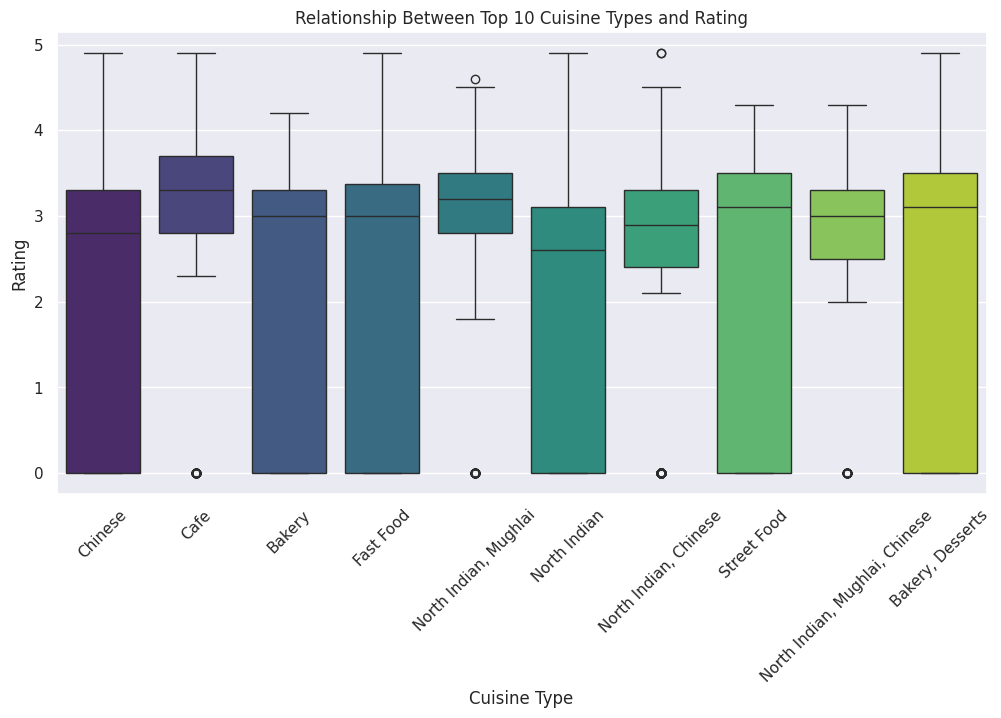

In [19]:
# Plot the relationship between the top 20 cuisine types and rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Rating', data=cuisine_ratings_top_10, palette='viridis')
plt.title('Relationship Between Top 10 Cuisine Types and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


# Plot the relationship between the top 20 cuisine types and rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisine', y='Rating', data=cuisine_ratings_top_10, palette='viridis')
plt.title('Relationship Between Top 10 Cuisine Types and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Create a DataFrame with cuisine types and corresponding votes
cuisine_votes = pd.DataFrame({'Cuisine': cuisines, 'Votes': df1['Votes']})

In [21]:
# Group by cuisine and sum the votes for each cuisine
cuisine_votes_sum = cuisine_votes.groupby('Cuisine')['Votes'].sum()

In [23]:
# Sort cuisines based on the total votes in descending order
popular_cuisines = cuisine_votes_sum.sort_values(ascending=False)

In [24]:
# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines Based on Number of Votes:")
print(popular_cuisines.head(10))

Top 10 Most Popular Cuisines Based on Number of Votes:
Cuisine
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


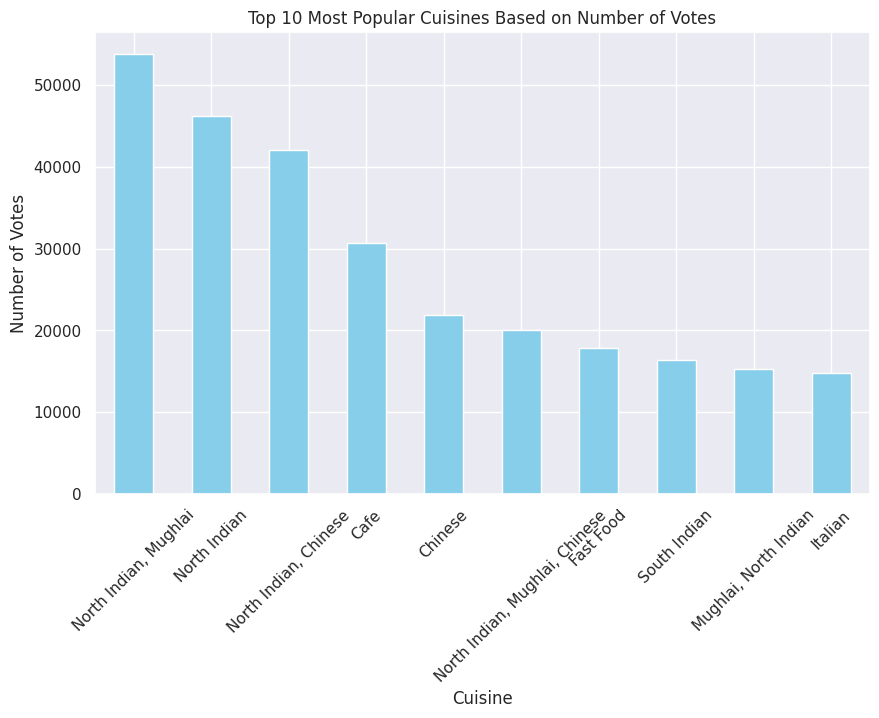

In [25]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
popular_cuisines.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()


##### 3. Determine if there are any specific cuisines that tend to receive higher ratings.

In [26]:
# Create a DataFrame with cuisine types and corresponding ratings
cuisine_ratings = pd.DataFrame({'Cuisine': cuisines, 'Rating': df1['Aggregate rating']})

In [27]:
# Calculate the average rating for each cuisine
average_rating_by_cuisine = cuisine_ratings.groupby('Cuisine')['Rating'].mean()



In [28]:
# Sort cuisines based on the average rating in descending order
sorted_cuisines_by_rating = average_rating_by_cuisine.sort_values(ascending=False)

In [29]:
# Display the top 10 cuisines with the highest average ratings
print("Top 10 Cuisines with the Highest Average Ratings:")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with the Highest Average Ratings:
Cuisine
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Rating, dtype: float64


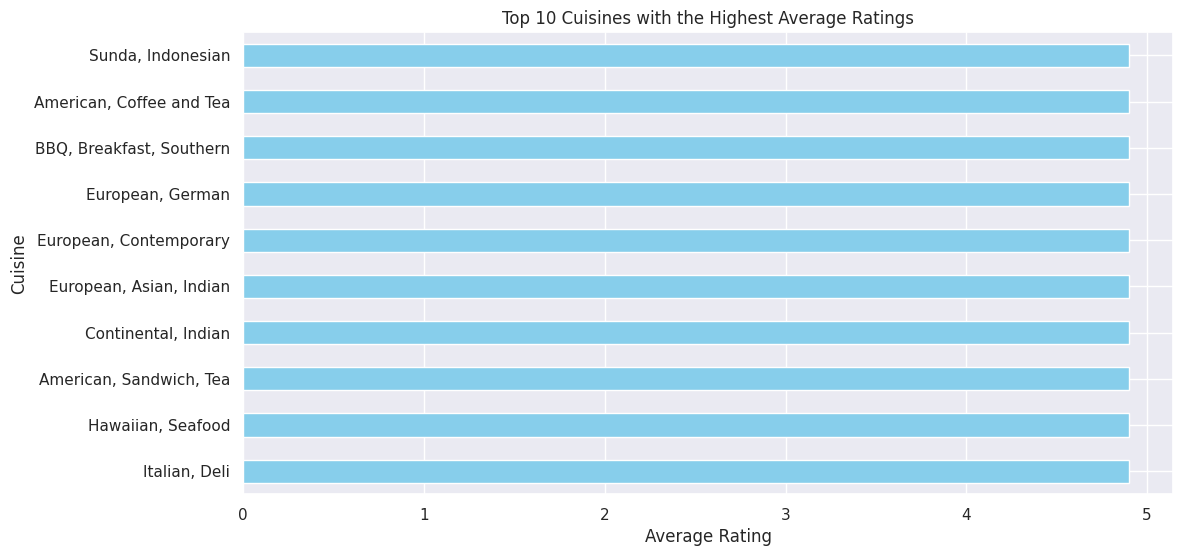

In [30]:
# Plot the graph
plt.figure(figsize=(12, 6))
sorted_cuisines_by_rating.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


# Level 3 - Task 3:-

## Task: Data Visualization

##### 1. Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

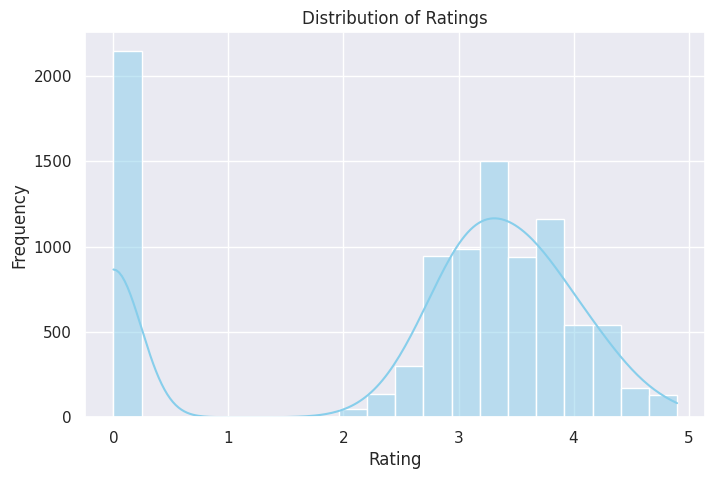

In [31]:
# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df1['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


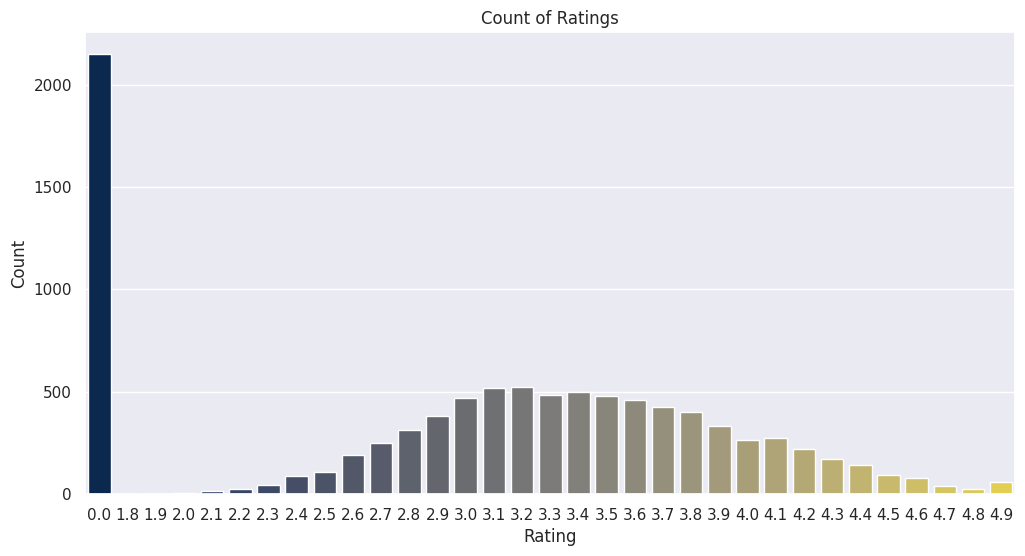

In [32]:
# Create a bar plot to visualize the count of ratings
plt.figure(figsize=(12, 6))
sns.countplot(x='Aggregate rating', data=df1, palette='cividis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


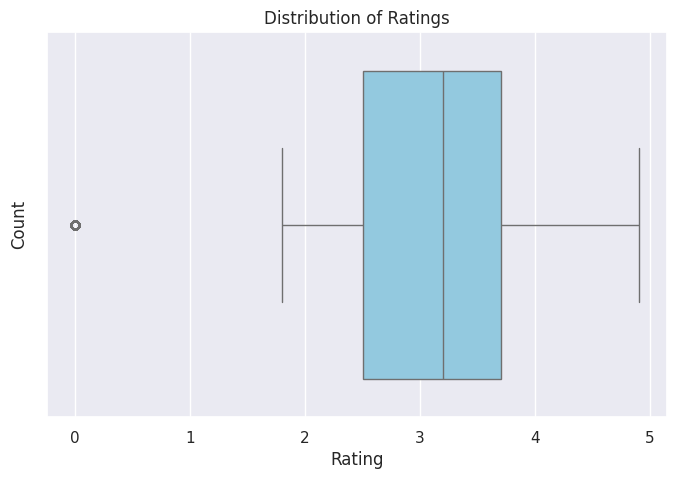

In [33]:
# Create a box plot to visualize the distribution of ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='Aggregate rating', data=df1, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 2. Compare the average ratings of different cuisines or cities using appropriate visualizations.

In [34]:
# Group data by city and calculate the average rating for each city
average_rating_by_city = df1.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

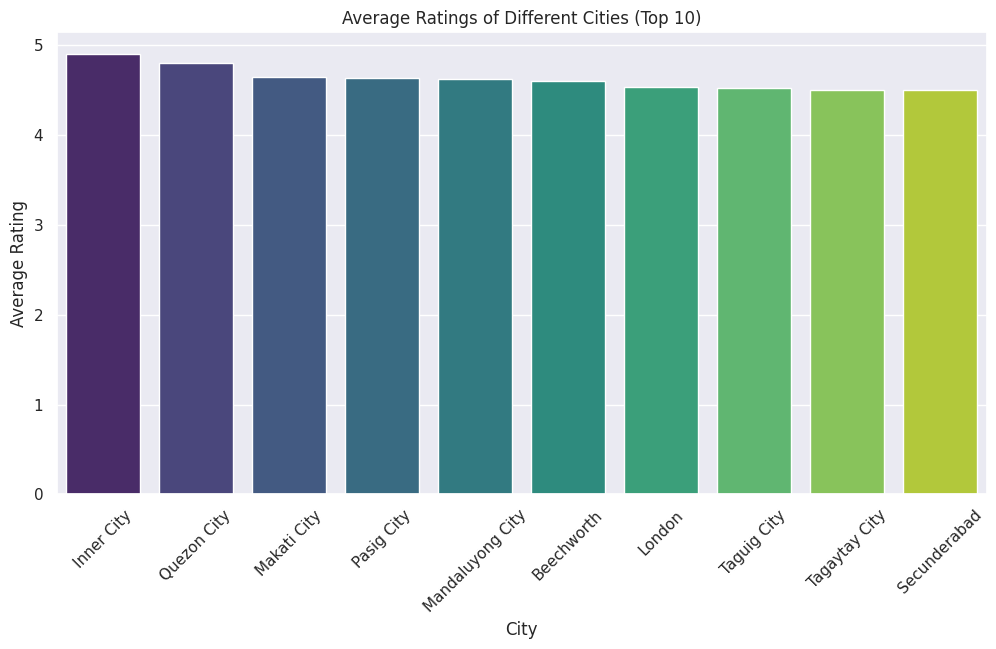

In [35]:
# Plot the average ratings of different cities (top 10 cities)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_rating_by_city.head(10).index, y=average_rating_by_city.head(10).values, palette='viridis')
plt.title('Average Ratings of Different Cities (Top 10)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

##### 3. Visualize the relationship between various features and the target variable to gain insights.



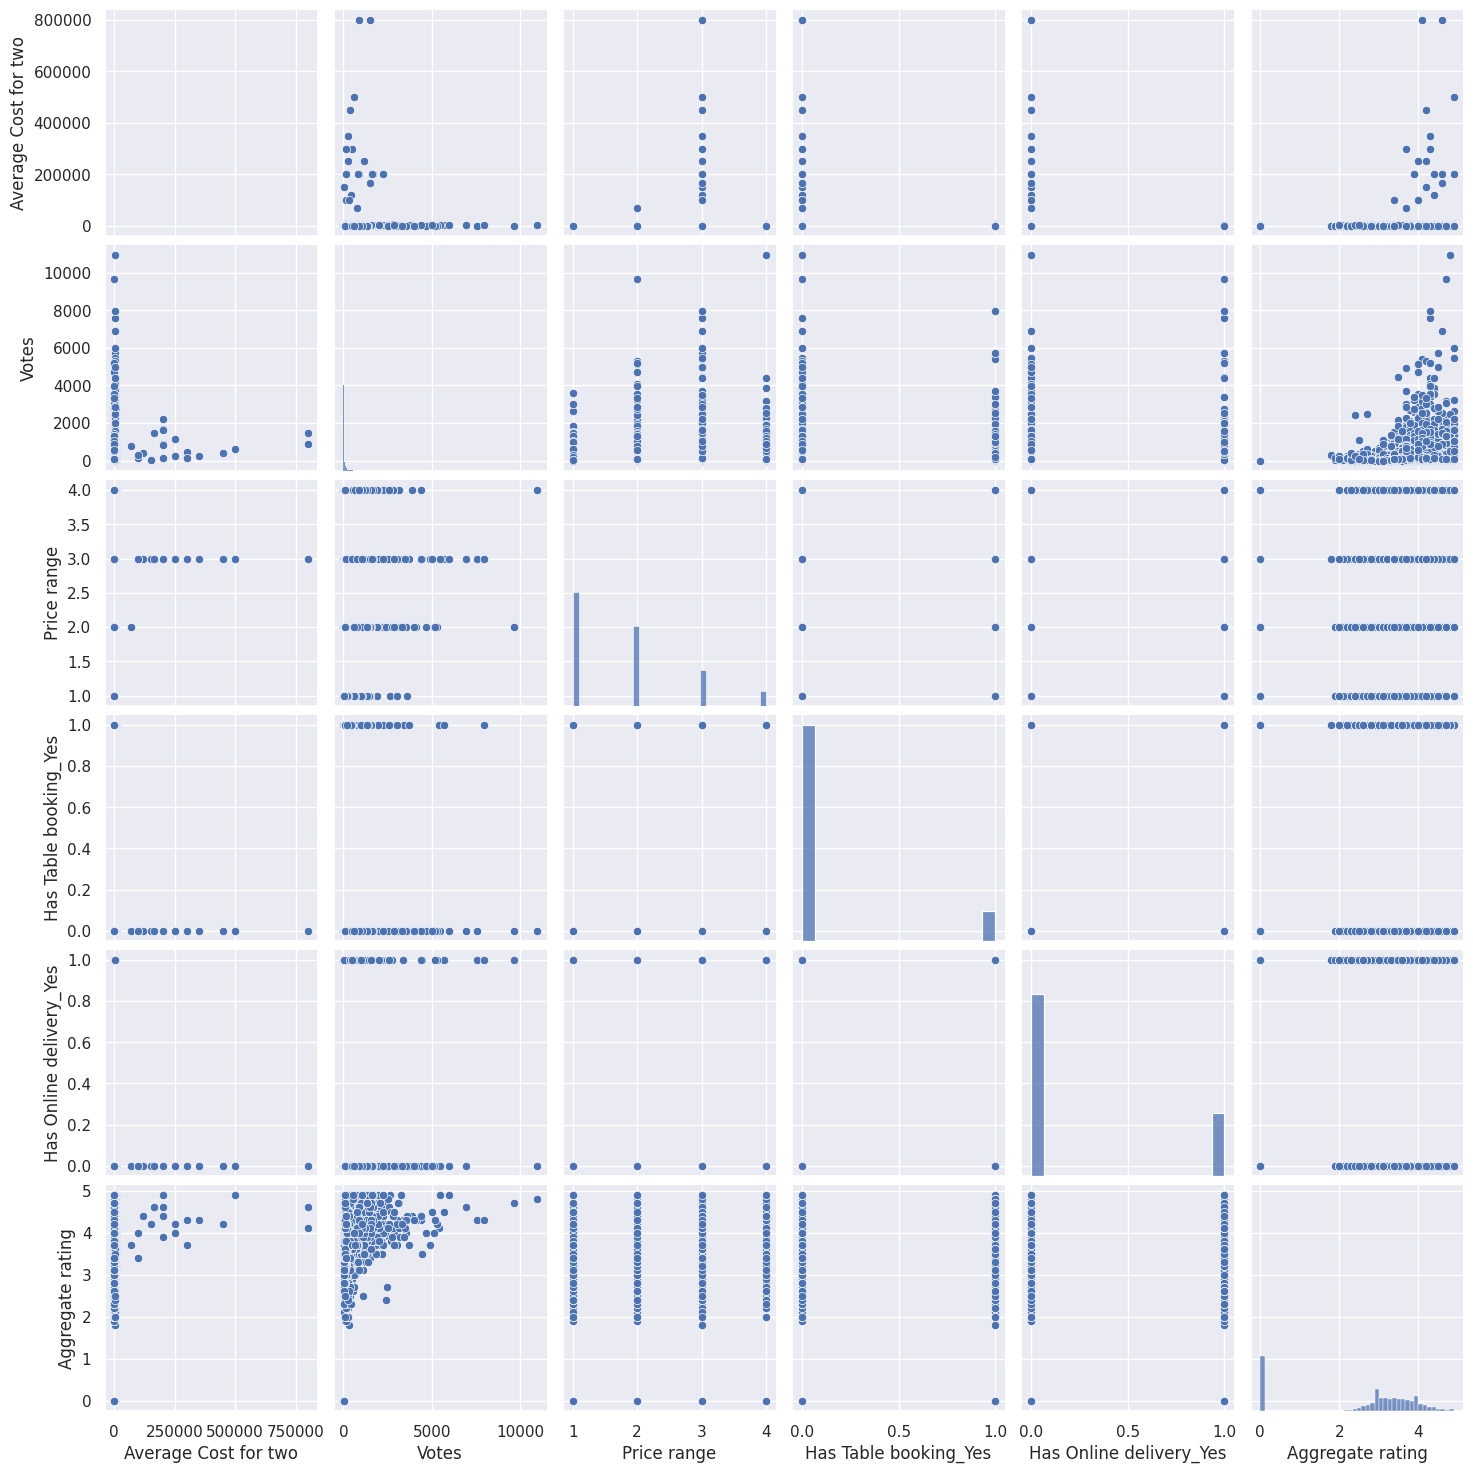

In [36]:
# Pair plot: Pairwise relationships between features and Aggregate Rating

features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes', 'Aggregate rating']
sns.pairplot(df1[features])
plt.show()
